# Visualización de Desigualdad de Género
Este cuaderno analiza y visualiza las brechas de género en ingresos, educación y empleo utilizando datos de la Encuesta de Igualdad de Género. Los datos fueron recolectados por Facebook en colaboración con instituciones internacionales en 2020.

### Descripción de la base de datos
- **Geography**: País o región.
- **Question Code**: Código de la pregunta.
- **Question Text**: Texto de la pregunta.
- **Response Category**: Categoría de respuesta.
- **Response Variable**: Variable de respuesta numérica o categórica.
- **Gender**: Género de los encuestados (masculino o femenino).
- **Value**: Valor asociado a la respuesta.

### Análisis y visualizaciones
- Análisis descriptivo de la base de datos.
- Comparación de respuestas por género en educación, ingresos y empleo.
- Visualización de brechas de género en países de Latinoamérica.


In [23]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


## 1. Cargar los datos
Cargamos los datos desde el archivo CSV proporcionado.

In [2]:
# Descargar la base de datos
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("yamilernestomorfa/encuesta-de-igualdad-de-genero-proyecto-rp")

# print("Path to dataset files:", path)

In [3]:
data_path = './data/Encuesta_de_Igualdad_de_Genero.csv'
data = pd.read_csv(data_path)

## 2. Limpieza de datos

In [4]:
# Filtrar por países de Latinoamérica
latam_countries = [
    'México', 'Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia',
    'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', 'Haití',
    'Honduras', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'Uruguay'
]
data_latam = data[data['Geography'].isin(latam_countries)]

## 3. Visualización de datos

In [ ]:
# Visualización 1: Distribución de respuestas por género y país
# Contar las respuestas por Geography y Gender
data_counts = data_latam.groupby(['Geography', 'Gender']).size().reset_index(name='Counts')

# Crear el Bubble Chart
fig = px.scatter(data_counts, x='Geography', y='Gender', size='Counts', color='Gender',
                 title='Distribución de poblaciones por Geography y Gender',
                 labels={'Geography': 'País', 'Gender': 'Género', 'Counts': 'Cantidad de respuestas'},
                 size_max=60)

fig.show()

d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


C:\Users\frany\AppData\Local\Temp\ipykernel_18232\842851237.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




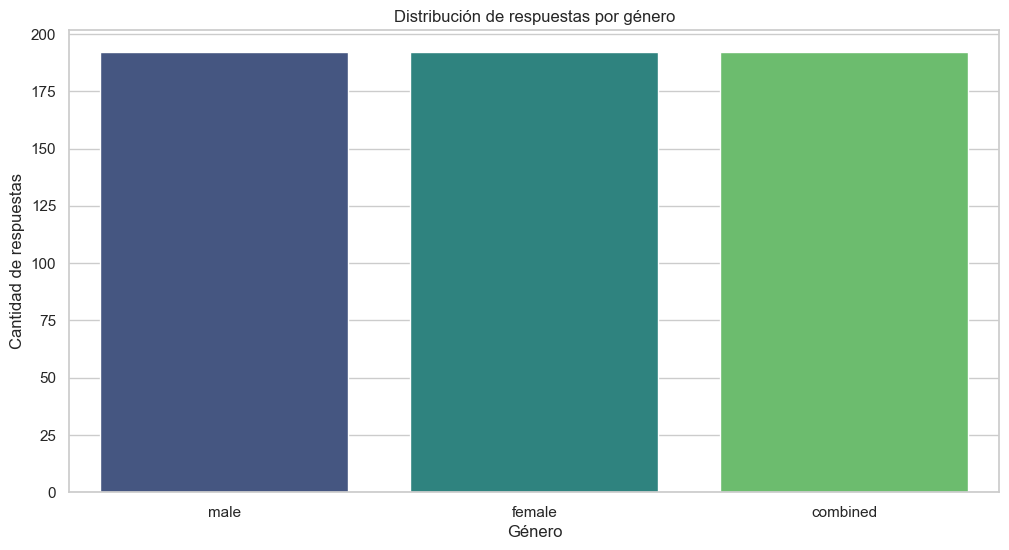

In [6]:
# Visualización 2: Distribución de respuestas por género
plt.figure()
sns.countplot(data=data_latam, x='Gender', palette='viridis')
plt.title('Distribución de respuestas por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de respuestas')
plt.show()



In [7]:
data_latam.columns

Index(['Geography', 'Question Code', 'Question Text', 'Response Category',
       'Response Variable', 'Gender', 'Value'],
      dtype='object')

In [8]:
data_latam['Response Category'].unique()

array([nan, 'Yes', 'No', 'Self', 'Does not fully cover own expenses',
       'Fully cover own expenses or fully covers their own expenses and others expenses',
       'Strongly Agree/Agree', 'Neutral', 'Strongly Disagree/Disagree',
       'Wages from employment of household members',
       'Any response except "Wage"', 'Full access',
       'Limited or No access'], dtype=object)

C:\Users\frany\AppData\Local\Temp\ipykernel_18232\3252305556.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\frany\AppData\Local\Temp\ipykernel_18232\3252305556.py:35: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




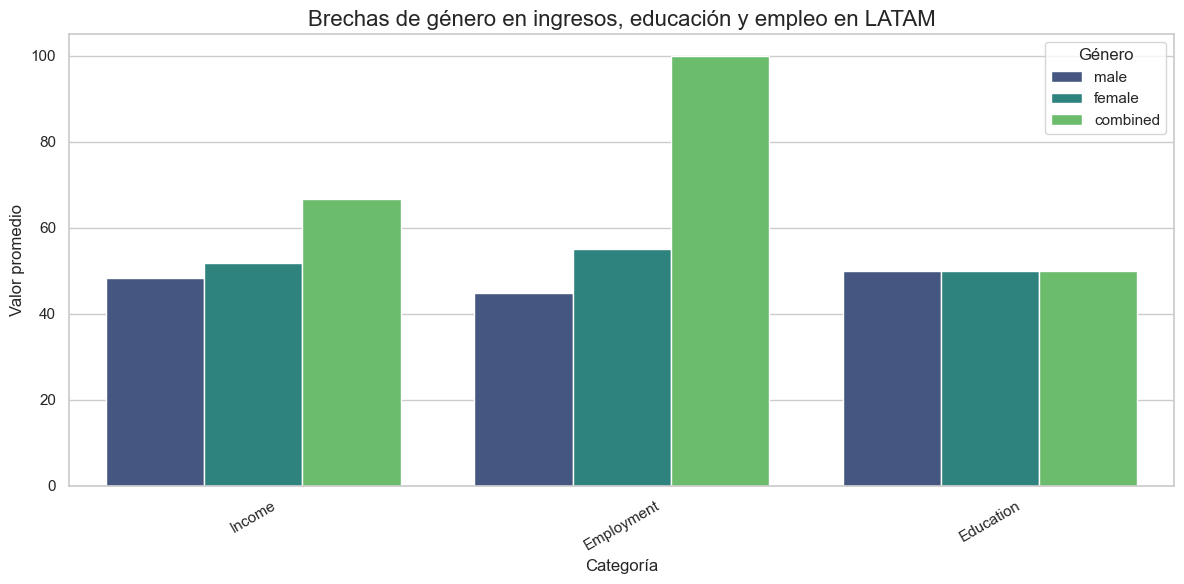

In [ ]:
# Visualización 3: Distribución de respuestas con ingresos, educación y empleo
# Definir categorías relacionadas con ingresos, educación y empleo
income_related = [
    'Does not fully cover own expenses',
    'Fully cover own expenses or fully covers their own expenses and others expenses',
    'Wages from employment of household members'
]
education_related = [
    'Full access',
    'Limited or No access'
]
employment_related = [
    'Any response except "Wage"'
]

# Crear una columna que agrupe las categorías en temas clave
def categorize_response(response):
    if response in income_related:
        return 'Income'
    elif response in education_related:
        return 'Education'
    elif response in employment_related:
        return 'Employment'
    else:
        return 'Other'

# Aplicar la categorización al dataset
data_latam['Category'] = data_latam['Response Category'].apply(categorize_response)

# Filtrar datos de interés
categories_of_interest = ['Income', 'Education', 'Employment']
data_interest = data_latam[data_latam['Category'].isin(categories_of_interest)]

# Visualización de brechas de género
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data_interest,
    x='Category', y='Value', hue='Gender', ci=None, palette='viridis'
)
plt.title('Brechas de género en ingresos, educación y empleo en LATAM', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Valor promedio', fontsize=12)
plt.legend(title='Género')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [10]:
# Visualización 4: Mapa coroplético de brechas de género en LATAM
# Filtrar datos relevantes para el mapa coroplético
data_choropleth = data_latam.groupby('Geography', as_index=False).agg({'Value': 'mean'})

# Crear el mapa coroplético
fig = px.choropleth(
    data_choropleth,
    locations="Geography",  # Columna que contiene los nombres de los países
    locationmode="country names",  # Modo para identificar los países
    color="Value",  # Columna que define los valores representados en el mapa
    color_continuous_scale="Viridis",  # Escala de colores
    title="Brechas de Género en LATAM (Valor Promedio por País)",
    labels={'Value': 'Valor Promedio'}
)

# Actualizar el diseño del mapa
fig.update_geos(
    showframe=False,  # Ocultar el marco
    showcoastlines=True,  # Mostrar las costas
    coastlinecolor="LightGrey"
)

# Mostrar el mapa
fig.show()


C:\Users\frany\AppData\Local\Temp\ipykernel_18232\3826005499.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



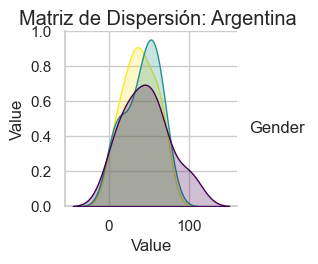

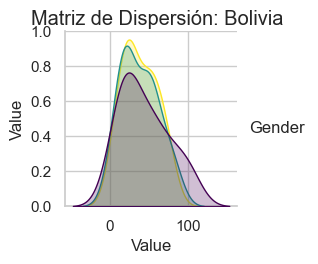

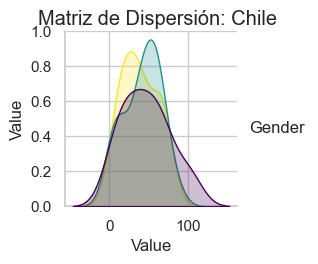

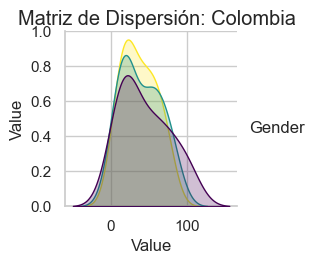

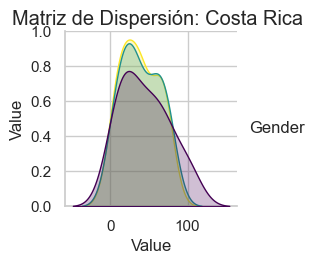

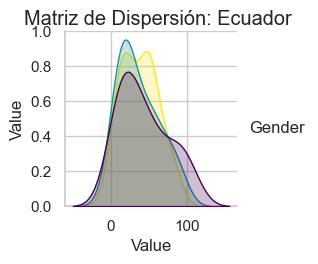

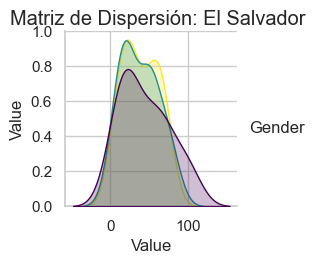

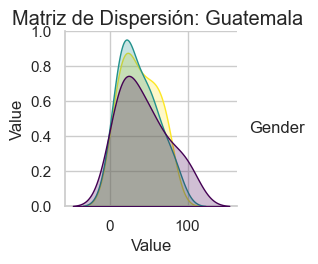

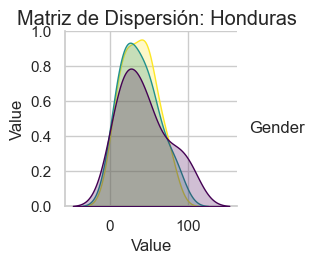

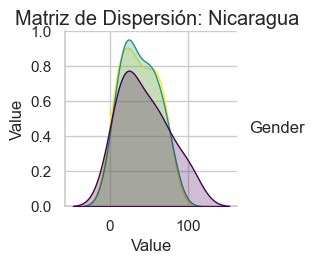

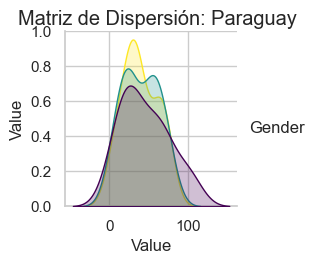

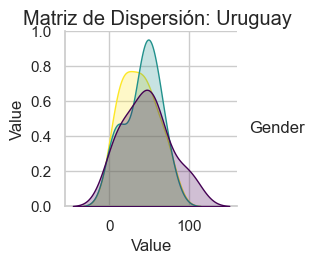

In [ ]:
# Visualización 5: Matriz de dispersión por país
# Preparar los datos
scatter_data = data_latam[['Geography', 'Value', 'Gender']]

# Convertir 'Gender' en numérico si es necesario
scatter_data['Gender'] = scatter_data['Gender'].astype('category').cat.codes

# Lista de países únicos
countries = scatter_data['Geography'].unique()

# Crear gráficos para cada país
for country in countries:
    data_country = scatter_data[scatter_data['Geography'] == country]

    sns.pairplot(
        data_country,
        diag_kind='kde',
        hue='Gender',  # Diferenciar por género
        palette='viridis'
    )
    plt.suptitle(f"Matriz de Dispersión: {country}", y=1.02)
    plt.show()


In [ ]:
# Visualización 5: Matriz de dispersión para comparar países y género
# Crear una matriz de dispersión para todos los países
fig = px.scatter_matrix(
    data_latam[data_latam.Gender!='combined'],  # Filtrar por género
    dimensions=["Value", "Category", "Geography"],  # Incluir dimensiones de análisis (puedes agregar más variables)
    color="Gender",  # Diferenciar por género
    # symbol="Geography",  # Usar un símbolo diferente para cada país
    title="Matriz de Dispersión: Comparación por Países y Género",
    labels={"Value": "Valor Promedio"},
    hover_name="Geography"
)

# Mostrar la gráfica
fig.update_traces(diagonal_visible=True)  # Mostrar histogramas en la diagonal
fig.show()


d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
# Visualización 6: Comparación de Valores Promedios por País y Género
import plotly.express as px
import pandas as pd

# Calcular el promedio por país y género
data_avg = data_latam.groupby(['Geography', 'Gender'], as_index=False)['Value'].mean()

# Crear un scatter plot con Plotly
fig = px.scatter(
    data_avg,
    x='Geography',  # Eje X: Países
    y='Value',       # Eje Y: Valor promedio
    color='Gender',  # Diferenciación por género
    size='Value',    # Tamaño proporcional al valor
    hover_name='Geography',  # Mostrar el nombre del país al pasar el cursor
    title="Comparación de Valores Promedios por País y Género",
    labels={
        'Geography': 'País',
        'Value': 'Valor Promedio',
        'Gender': 'Género'
    }
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title="País",
    yaxis_title="Valor Promedio",
    legend_title="Género",
    xaxis=dict(tickangle=45),
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()


d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [44]:
# Visualización 7: Densidad de Valores Promedios por País y Género
# Calcular el promedio por país y género
data_avg = data_latam.groupby(['Geography', 'Gender'], as_index=False)['Value'].mean()

# Crear listas para los ejes X e Y basados en Género
x_values = data_avg[data_avg['Gender'] == 'male']['Value']  # Valores de hombres
y_values = data_avg[data_avg['Gender'] == 'female']['Value']  # Valores de mujeres

# Crear el gráfico de densidad con contornos
fig = ff.create_2d_density(
    x=x_values,
    y=y_values,
    colorscale='Greens',
    hist_color='rgba(100, 255, 120, 0.2)',
    point_size=2,
    title="Densidad de Valores Promedios: Hombres vs Mujeres"
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title="Promedio de Valores (Hombres)",
    yaxis_title="Promedio de Valores (Mujeres)",
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()


In [50]:
# Visualización 8: Comparación de Valores Promedios con Gráfica de Violín
# Crear la gráfica de violín
fig = px.violin(data_latam, 
                y='Value', 
                color='Gender', 
                box=True, 
                points="all",  # Muestra todos los puntos
                title="Comparación de Valores Promedios: Hombres vs Mujeres")

# Configuración de los ejes
fig.update_layout(
    xaxis_title="Género",
    yaxis_title="Valor Promedio",
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()


d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
# Visualización 9: Comparación de Valores Promedios por Pais con Gráfica de Violín
# Crear la gráfica de violín, separada por país y género
fig = px.violin(data_latam, 
                y='Value', 
                x='Geography', 
                color='Gender', 
                box=True, 
                points="all",  # Muestra todos los puntos
                title="Comparación de Valores Promedios: Hombres vs Mujeres por País")

# Configuración de los ejes
fig.update_layout(
    xaxis_title="País",
    yaxis_title="Valor Promedio",
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()

d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [62]:
# Visualización 10: Comparación de Valores Promedios por País con Distribuciones Marginales
# Calcular el valor promedio por país y género
promedio_por_pais_genero_male = data_latam[data_latam.Gender!='combined'][data_latam.Gender=='male'].groupby(['Geography', 'Gender'])['Value'].mean().reset_index()
promedio_por_pais_genero_female = data_latam[data_latam.Gender!='combined'][data_latam.Gender=='female'].groupby(['Geography', 'Gender'])['Value'].mean().reset_index()


# Crear el gráfico de dispersión con las distribuciones marginales
fig = px.scatter(data_latam[data_latam.Gender!='combined'], 
                 x='Geography', 
                 y='Value', 
                 color='Gender', 
                 marginal_x="histogram",  # Agrega un histograma marginal para el eje X (País)
                 marginal_y="violin",     # Agrega un gráfico de violín marginal para el eje Y (Valor)
                 title="Comparación de Valores Promedios: Hombres vs Mujeres por País con Distribuciones Marginales")


# Agregar los valores promedio por país y género como puntos
fig.add_scatter(x=promedio_por_pais_genero_male['Geography'], 
                y=promedio_por_pais_genero_male['Value'], 
                mode='markers', 
                marker=dict(color='blue', size=10, symbol='x'),  # Puntos en color negro
                name='Promedio por País y Género')

fig.add_scatter(x=promedio_por_pais_genero_female['Geography'], 
                y=promedio_por_pais_genero_female['Value'], 
                mode='markers', 
                marker=dict(color='red', size=10, symbol='x'),  # Puntos en color negro
                name='Promedio por País y Género')

# Configuración de los ejes
fig.update_layout(
    xaxis_title="País",
    yaxis_title="Valor Promedio",
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()

C:\Users\frany\AppData\Local\Temp\ipykernel_18232\1016941496.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\frany\AppData\Local\Temp\ipykernel_18232\1016941496.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [66]:
# Visualización 11: 
# Calcular el valor promedio por país y género
promedio_por_pais_genero = data_latam.groupby(['Geography', 'Gender'])['Value'].mean().reset_index()

# Crear una columna 'Valor Promedio' para usar en el gráfico Sunburst
promedio_por_pais_genero['Valor Promedio'] = promedio_por_pais_genero['Value']

# Crear el gráfico Sunburst
fig = px.sunburst(promedio_por_pais_genero, 
                  path=['Geography', 'Gender'], 
                  values='Valor Promedio',
                  title="Distribución de Valores Promedios: Hombres vs Mujeres por País")

# Configuración de la gráfica
fig.update_layout(
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()